In [2]:
%matplotlib inline
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [3]:
A = np.array([[3,1],[1,2]])
b = np.array([1,1])
x_ideal = linalg.solve(A,b)
x_ideal

array([0.2, 0.4])

# Method of Steepest Descent (SD)
The SD method consists of three steps:

1. Finding a search direction (-residual)
2. Finding an ideal stepsize in the search direction
3. Updating.

Task: Implement a method steepest_descent_step(A,b,x) that does one steepest descent step.
It should return a tuple of (new_x, direction, stepsize).

In [4]:
def compute_residual(A, b, x):
    return A @ x - b 

In [5]:
# %load solution_steepest_descent.py

def compute_stepsize(A, residual):
    # TODO
    return residual.dot(residual) / residual.dot(A @ residual)

def steepest_descent_step(A, b, x):
    # TODO
    direction = -compute_residual(A,b, x)
    alpha = compute_stepsize(A, direction)
    return x + alpha * direction, direction, alpha
    return x, direction, alpha

In [6]:
def check_converged(A,x,b):
    return np.linalg.norm(A @ x - b) < 1e-14

x, direction, alpha = steepest_descent_step(A, b, np.array([0,0]))

In [7]:
def compute_A_weighted_error(A, x, x_ideal):
    error = (x - x_ideal)
    return np.sqrt(error.dot(A @ error))

x = np.array([0,0])
error_before = compute_A_weighted_error(A, x, x_ideal)

xs = []
residuals = []
directions = []
errors = []
error_reductions = []

print(error_before)
for i in range(100):
    x, direction, alpha = steepest_descent_step(A, b, x)
    print("Alpha", alpha)
    print(x - x_ideal)
    error = compute_A_weighted_error(A, x, x_ideal)
    print("Residual", np.linalg.norm(direction))
    print("Error", error)
    error_reduction = error/error_before
    print("Error-reduction in A norm", error_reduction)
    error_before = error
    
    xs.append(x)
    directions.append(direction)
    residuals.append(np.linalg.norm(-direction))
    errors.append(error)
    error_reductions.append(error_reduction)
    
    if check_converged(A,x,b):
        break

0.7745966692414834
Alpha 0.2857142857142857
[ 0.08571429 -0.11428571]
Residual 1.4142135623730951
Error 0.16903085094570336
Error-reduction in A norm 0.21821789023599242
Alpha 0.6666666666666667
[-0.00952381 -0.01904762]
Residual 0.20203050891044214
Error 0.036885555678165816
Error-reduction in A norm 0.21821789023599197
Alpha 0.2857142857142857
[ 0.00408163 -0.00544218]
Residual 0.0673435029701473
Error 0.008049088140271629
Error-reduction in A norm 0.2182178902359939
Alpha 0.6666666666666667
[-0.00045351 -0.00090703]
Residual 0.00962050042430678
Error 0.0017564550322935865
Error-reduction in A norm 0.21821789023598792
Alpha 0.28571428571428575
[ 0.00019436 -0.00025915]
Residual 0.0032068334747688216
Error 0.0003832899114415061
Error-reduction in A norm 0.21821789023599683
Alpha 0.6666666666667428
[-2.15959400e-05 -4.31918799e-05]
Residual 0.00045811906782401647
Error 8.364071582343416e-05
Error-reduction in A norm 0.2182178902358054
Alpha 0.28571428571432766
[ 9.25540284e-06 -1.23405

(0.0, 1.0)

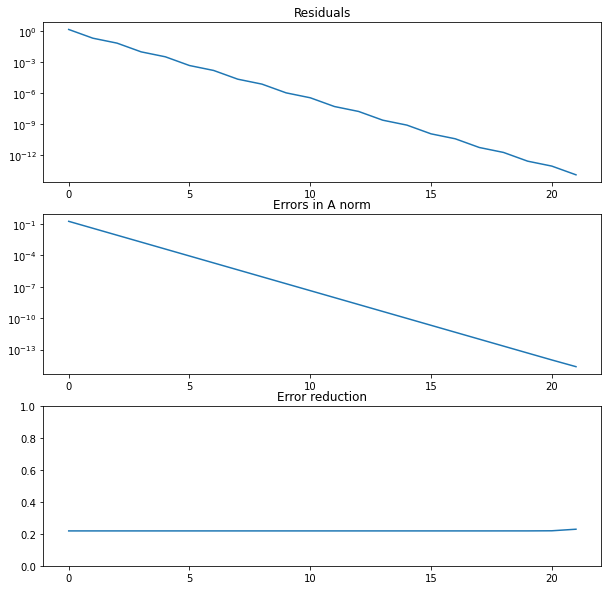

In [8]:
fig, axs = plt.subplots(3, figsize=(10,10))
x = range(0, len(residuals))
axs[0].semilogy(x, residuals)
axs[0].set_title("Residuals")

axs[1].semilogy(x, errors)
axs[1].set_title("Errors in A norm")

axs[2].plot(x, error_reductions)
axs[2].set_title("Error reduction")

axs[2].set_ylim(0,1)

## Directions
The SD method searches the same direction many times. Below, we plot the search directions taken by our algorithm.
We normalize the direction such that it is clearer that they repeat.

In [ ]:
normalized_directions = [dir / np.linalg.norm(dir) for dir in directions] # normalize directions
fig, axs = plt.subplots(3,3, sharex=True, sharey=True, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    ax.plot([0,normalized_directions[i][0]], [0,normalized_directions[i][1]])
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_title(f"direction {i}")

In [ ]:
# This shows the solution path from initial guess (black x) to solution (red x)-
# Here it is also clear that the same direction gets searched twice.
fig, ax = plt.subplots()
ax.plot([x[0] for x in xs], [x[1] for x in xs], c="black")
ax.scatter(x_ideal[0], x_ideal[1], marker="x", c="red")
ax.scatter(xs[0][0], xs[0][1], marker="x", c="black")

# A-orthogonal search directions
We discussed in the tutorial that given pairwise A-orthogonal search direction $d_1, \ldots, d_N$, we can use this to construct a solution to the linear system $Ax = b$ for $A$ that is symmetric positive definite.

The idea is to split x into this basis:
$$ x = \sum_{i_=1}^N \alpha_i d_i$$

Task: Compute alpha.

In [ ]:
# %load solution_compute_alpha_from_search_direction.py

def compute_alpha_from_search_direction(A, b, direction):
    # TODO Implement
    return 0.0

In [ ]:
# Two A-orthogonal search directions
d1 = np.array([1.0, 0.0])
d2 = np.array([-1.0, 3.0])

d1.dot(A@d2)

In [ ]:
# Compute coefficients
a1 = compute_alpha_from_search_direction(A, b, d1)
a2 = compute_alpha_from_search_direction(A, b, d2)

# Write down solution in search direction basis
x = a1*d1 + a2*d2
x, np.linalg.norm(x-x_ideal)